## Credit Card Fraud Detection

In this project you will predict fraudulent credit card transactions with the help of Machine learning models. Please import the following libraries to get started.

In [0]:
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

import numpy as np
import pandas as pd
import io

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing

## Exploratory data analysis

In [3]:
# Load the Credit Card dataset
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
#observe the different feature type present in the data
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
data.shape

(284807, 31)

Here we will observe the distribution of our classes

In [0]:
classes=data['Class'].value_counts()
normal_share=classes[0]/data['Class'].count()*100
fraud_share=classes[1]/data['Class'].count()*100

Text(0, 0.5, 'Frequency')

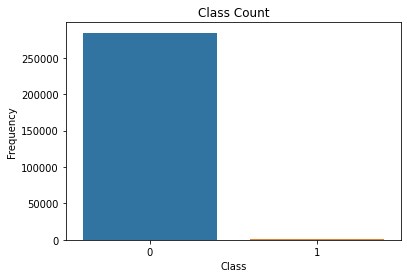

In [7]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
sns.countplot(x="Class", data=data)
plt.title("Class Count")
plt.xlabel("Class")
plt.ylabel("Frequency")

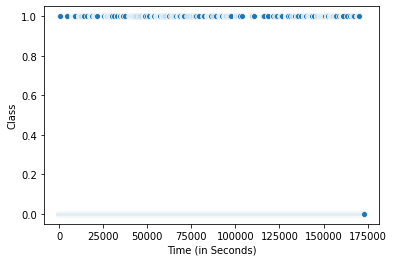

In [8]:
# Create a scatter plot to observe the distribution of classes with time
fraud = data[data.Class == 1]
normal = data[data.Class == 0]

sns.scatterplot(data.Time, data.Class)

plt.xlabel('Time (in Seconds)')
plt.ylabel('Class')

plt.show()

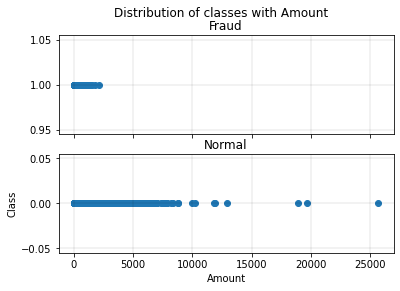

In [9]:
# Create a scatter plot to observe the distribution of classes with Amount
  f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
  f.suptitle('Distribution of classes with Amount')

  ax1.scatter(fraud.Amount, fraud.Class)
  ax1.set_title('Fraud')
  ax1.grid(color='k', linestyle='-', linewidth=0.1)


  ax2.scatter(normal.Amount, normal.Class)
  ax2.set_title('Normal')
  ax2.grid(color='k', linestyle='-', linewidth=0.1)


  plt.xlabel('Amount')
  plt.ylabel('Class')
  plt.show()

In [10]:
# Data Scaling
from sklearn.preprocessing import StandardScaler
model_data = data.drop(['Time'], axis=1)
model_data['Amount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))
model_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


### Splitting the data into train & test data

In [0]:
model_train = model_data.drop("Class", 1).values
model_test = model_data["Class"].values

# Using SMOTE to sample the unbalanced data
from imblearn.over_sampling import SMOTE
oversampler = SMOTE(random_state = 0, n_jobs = -1)
model_train_lr , model_test_lr = oversampler.fit_sample(model_train, model_test)

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(model_train_lr, model_test_lr, test_size = 0.25, random_state = 0)

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [13]:
print(np.sum(Y_train))
print(np.sum(Y_test))

213013
71302


## Model Building
- Build different models on the imbalanced dataset and see the result

In [14]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=200, random_state=0, n_jobs = -1)
lr.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=0,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

In [0]:
lr_predict = lr.predict(X_test)

Accuracy: 94.4808%
Recall: 91.5108%
ROC AUC: 94.4901%


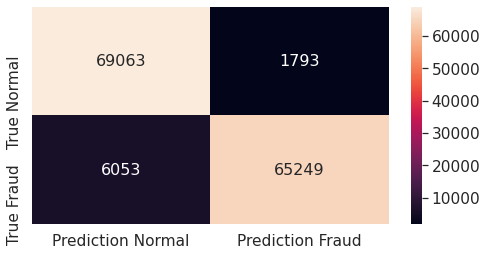

In [17]:
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix,roc_auc_score

lr_accuracy = accuracy_score(Y_test, lr_predict)
lr_recall = recall_score(Y_test, lr_predict)
lr_cm = confusion_matrix(Y_test, lr_predict)
lr_auc = roc_auc_score(Y_test, lr_predict)

print("Accuracy: {:.4%}".format(lr_accuracy))
print("Recall: {:.4%}".format(lr_recall))
print("ROC AUC: {:.4%}".format(lr_auc))

lr_cm = pd.DataFrame(lr_cm, ['True Normal','True Fraud'],['Prediction Normal','Prediction Fraud'])
pyplot.figure(figsize = (8,4))
sns.set(font_scale=1.4)
sns.heatmap(lr_cm, annot=True,annot_kws={"size": 16},fmt='g')

In [18]:
# Random FOrest Classifier
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators= 200, criterion = 'entropy', random_state = 0, n_jobs = -1)
rf.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [0]:
rf_predict = rf.predict(X_test)

Accuracy: 99.9909%
Recall: 100.0000%
ROC AUC: 99.9908%


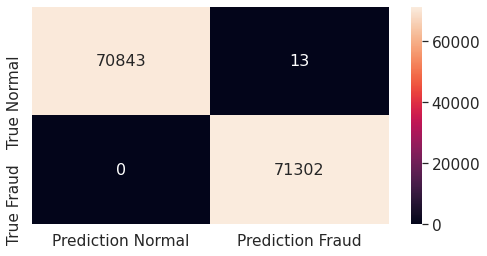

In [20]:
rf_accuracy = accuracy_score(Y_test, rf_predict)
rf_recall = recall_score(Y_test, rf_predict)
rf_cm = confusion_matrix(Y_test, rf_predict)
rf_auc = roc_auc_score(Y_test, rf_predict)

print("Accuracy: {:.4%}".format(rf_accuracy))
print("Recall: {:.4%}".format(rf_recall))
print("ROC AUC: {:.4%}".format(rf_auc))

rf_cm = pd.DataFrame(rf_cm, ['True Normal','True Fraud'],['Prediction Normal','Prediction Fraud'])
pyplot.figure(figsize = (8,4))
sns.set(font_scale=1.4)
sns.heatmap(rf_cm, annot=True,annot_kws={"size": 16},fmt='g')

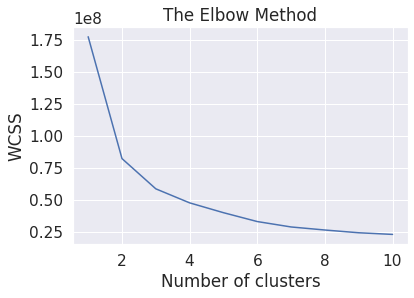

In [21]:
# KMeans classifier
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, max_iter = 200, random_state = 0, n_jobs = -1)
    kmeans.fit(model_train_lr)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [0]:
kmeans = KMeans(n_clusters = 2, max_iter = 200, random_state = 0, n_jobs = -1).fit(model_train_lr)

In [24]:
centers = kmeans.cluster_centers_

from scipy import spatial
distance = pd.DataFrame(spatial.distance.cdist(model_train_lr, centers, 'euclidean'))
distance['distance_mean'] = distance.apply(np.mean, axis=1)
distance.head()

,0,1,distance_mean
0,5.666570,38.973187,22.319879
1,4.794702,38.884258,21.839480
2,7.495325,39.358736,23.427031
3,6.193039,39.171095,22.682067
4,5.546435,38.912090,22.229263


In [0]:
out_per = np.percentile(distance['distance_mean'], 95)

In [0]:
model_predict_lr = np.where(distance['distance_mean'] >= out_per, 1, 0)

Accuracy: 54.3814%
Recall: 9.3815%
ROC AUC: 54.3814%


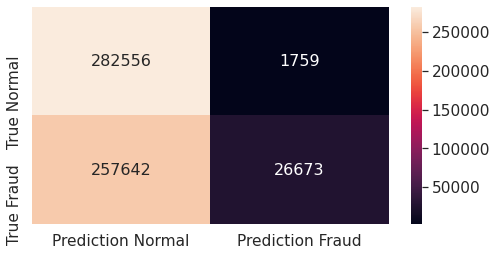

In [28]:
km_accuracy = accuracy_score(model_test_lr, model_predict_lr)
km_recall = recall_score(model_test_lr, model_predict_lr)
km_cm = confusion_matrix(model_test_lr, model_predict_lr)
km_auc = roc_auc_score(model_test_lr, model_predict_lr)

print("Accuracy: {:.4%}".format(km_accuracy))
print("Recall: {:.4%}".format(km_recall))
print("ROC AUC: {:.4%}".format(km_auc))

km_cm = pd.DataFrame(km_cm, ['True Normal','True Fraud'],['Prediction Normal','Prediction Fraud'])
pyplot.figure(figsize = (8,4))
sns.set(font_scale=1.4)
sns.heatmap(km_cm, annot=True,annot_kws={"size": 16},fmt='g')

In [0]:
Prediction_Accuracy={
    'Logistic Regression': lr_accuracy,
    'Random Forest': rf_accuracy,
    'K-Means': km_accuracy
}

Prediction_Recall={
    'Logistic Regression': lr_recall,
    'Random Forest': rf_recall,
    'K-Means': km_recall
}

Prediction_AUC={
    'Logistic Regression': lr_auc,
    'Random Forest': rf_auc,
    'K-Means': km_auc
}

Text(0.5, 0, 'Accuracy Score')

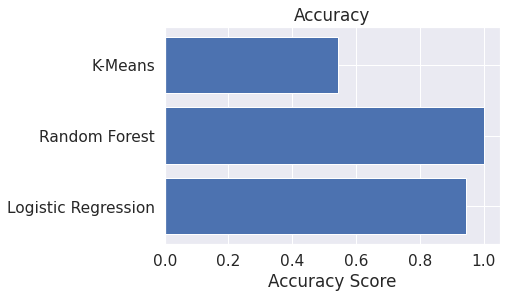

In [30]:
pyplot.title('Accuracy')
pyplot.barh(range(len(Prediction_Accuracy)), list(Prediction_Accuracy.values()), align='center')
pyplot.yticks(range(len(Prediction_Accuracy)), list(Prediction_Accuracy.keys()))
pyplot.xlabel('Accuracy Score')

Text(0.5, 0, 'Recall Score')

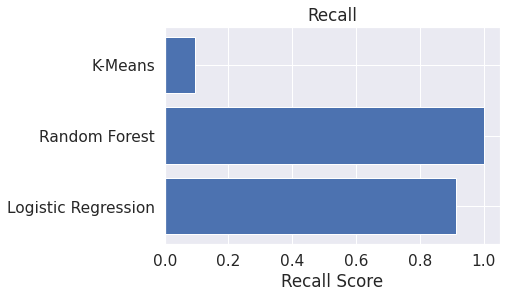

In [31]:
pyplot.title('Recall')
pyplot.barh(range(len(Prediction_Recall)), list(Prediction_Recall.values()), align='center')
pyplot.yticks(range(len(Prediction_Recall)), list(Prediction_Recall.keys()))
pyplot.xlabel('Recall Score')

1) Supervised Learning Methods clearly dominates Unsupervised Learning Methods for a class imbalance dataset. 

2) Random Forest Classifier has higher accuracy than Logistic Regresssion followed by K-Means Clustering. 

3) Similarly, Random Forest Classifier has higher recall score than Logistic Regresssion followed by K-Means Clustering. 

4) Similarly, Random Forest Classifier has higher auc score  Logistic Regresssion followed by K-Means Clustering. 

5) Therefore, I would like to conclude that Supervised Learning Methods such as Random Forest Classifier gives a better            prediction over Unsupervised Methods. 